In [1]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the libraries 
import h5py
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D
from sklearn import model_selection, preprocessing

In [3]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
# importing the dataset
h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

In [5]:
# checking the keys/features in the dataset
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [6]:
# Loading the training and test sets
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [7]:
# Checking the shape of the dataset
print('X_train shape = ', X_train.shape)
print('y_train shape =', y_train.shape)
print('X_test shape =', X_test.shape)
print('y_test shape =' , y_test.shape)

X_train shape =  (42000, 32, 32)
y_train shape = (42000,)
X_test shape = (18000, 32, 32)
y_test shape = (18000,)


In [8]:
# one hot encoding the train and test labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
# building the model
model = tf.keras.models.Sequential()

In [11]:
# reshapping the features/ flattened the input
model.add(tf.keras.layers.Reshape((1024,), input_shape=(32,32)))

In [12]:
## another approach to building the model with flatten
model_flt = Sequential([Input(shape=(32,32)),
                                   Flatten(),
                                   Dense(1, activation='relu')])
model_flt.summary()    

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [13]:
# normalizing the features
model.add(tf.keras.layers.BatchNormalization())

In [14]:
# checking the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
Total params: 4,096
Trainable params: 2,048
Non-trainable params: 2,048
_________________________________________________________________


In [15]:
# adding the first layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

In [16]:
# adding the second layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

In [17]:
# adding the output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [18]:
# to save the best model
ckpt = tf.keras.callbacks.ModelCheckpoint('h5py_v1.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [19]:
# compliing the model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 230,206
Trainable params: 228,158
Non-trainable params: 2,048
_________________________________________________________________


In [21]:
# training the model
train = model.fit(X_train,y_train, epochs = 10, batch_size = 32, validation_data=(X_test, y_test), callbacks=ckpt)

Epoch 1/10
1296/1313 [============================>.] - ETA: 0s - loss: 1.3404 - accuracy: 0.5626
Epoch 00001: val_accuracy improved from -inf to 0.70922, saving model to h5py_v1.hdf5
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3367 - accuracy: 0.5640 - val_loss: 0.9453 - val_accuracy: 0.7092
Epoch 2/10
1300/1313 [============================>.] - ETA: 0s - loss: 0.9470 - accuracy: 0.7040
Epoch 00002: val_accuracy improved from 0.70922 to 0.75222, saving model to h5py_v1.hdf5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9462 - accuracy: 0.7043 - val_loss: 0.8280 - val_accuracy: 0.7522
Epoch 3/10
1305/1313 [============================>.] - ETA: 0s - loss: 0.8236 - accuracy: 0.7402
Epoch 00003: val_accuracy improved from 0.75222 to 0.77828, saving model to h5py_v1.hdf5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.8231 - accuracy: 0.7401 - val_loss: 0.7436 - val_accuracy: 0.7783
Epoch 4/10
1292/1313 [=====================

In [22]:
# loading the model saved with the best acccuracy
model = tf.keras.models.load_model('/content/h5py_v1.hdf5')

In [23]:
# getting the predictions
predictions = model.predict(X_test)

**************************************************************************
TEST LABEL CHECKING AGAINST-  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
IMAGE IN DATASET : 


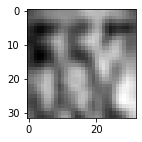

PREDICTED LABEL-  5
**************************************************************************
TEST LABEL CHECKING AGAINST-  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
IMAGE IN DATASET : 


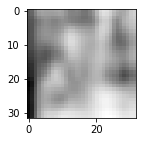

PREDICTED LABEL-  9
**************************************************************************
TEST LABEL CHECKING AGAINST-  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
IMAGE IN DATASET : 


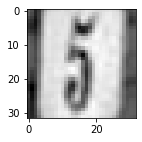

PREDICTED LABEL-  5
**************************************************************************
TEST LABEL CHECKING AGAINST-  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
IMAGE IN DATASET : 


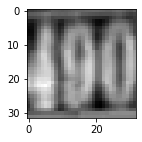

PREDICTED LABEL-  9
**************************************************************************
TEST LABEL CHECKING AGAINST-  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
IMAGE IN DATASET : 


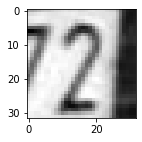

PREDICTED LABEL-  2
**************************************************************************
TEST LABEL CHECKING AGAINST-  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
IMAGE IN DATASET : 


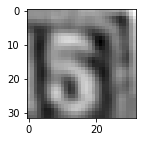

PREDICTED LABEL-  5
**************************************************************************
TEST LABEL CHECKING AGAINST-  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
IMAGE IN DATASET : 


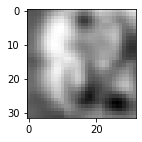

PREDICTED LABEL-  5
**************************************************************************
TEST LABEL CHECKING AGAINST-  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
IMAGE IN DATASET : 


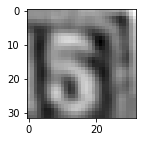

PREDICTED LABEL-  5
**************************************************************************
TEST LABEL CHECKING AGAINST-  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
IMAGE IN DATASET : 


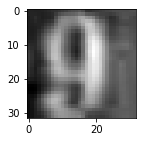

PREDICTED LABEL-  9
**************************************************************************
TEST LABEL CHECKING AGAINST-  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
IMAGE IN DATASET : 


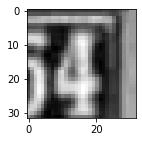

PREDICTED LABEL-  4


In [27]:
# validating the predictions against few labels

for i in range(10):
  print('**************************************************************************')
  
  numb = random.randint(1,101)
  #print(predictions[numb])
  print("TEST LABEL CHECKING AGAINST- " ,y_test[numb])

  print("IMAGE IN DATASET : ")
  import matplotlib.pyplot as plt
  plt.figure(figsize = (2,2))
  plt.imshow(X_test[numb].reshape(32,32), cmap = 'gray') #image, reshape size, cmap
  plt.show()

  print("PREDICTED LABEL- " , np.argmax(predictions[numb]))

In [25]:
# checking the loss of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.5788806676864624
Accuracy: 0.8352222442626953


Text(0.5, 1.0, 'Training and validation loss')

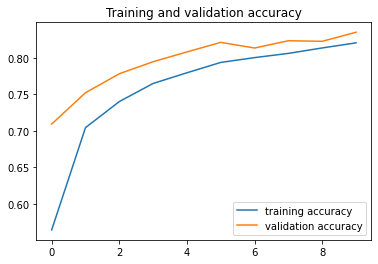

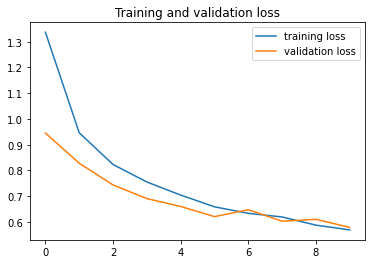

In [26]:
# visualizing the accuracy from the batches run
accuracy = train.history['accuracy'] #rcs
val_accuracy = train.history['val_accuracy'] #rcs
loss = train.history['loss']
val_loss = train.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy' )
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss' )
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')

In [28]:
# Model has an accuracy of 84%
# Tested for few datapoints and the model has been able to predict it correctly.